In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
df = pd.read_csv('TadiranvsSaft_3-28-24_DailyAVG.csv')

In [30]:
df

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status
0,3/3/2024,401728,1.86,1856,Tadiran,Warning
1,1/7/2024,401428,1.92,1920,Tadiran,Warning
2,2/25/2024,401728,1.94,1936,Tadiran,Warning
3,3/23/2024,400908,1.94,1936,Tadiran,Warning
4,3/28/2024,400868,1.94,1936,Tadiran,Warning
...,...,...,...,...,...,...
440371,1/11/2024,400777,3.55,3552,Tadiran,Irregular
440372,2/22/2024,400773,3.55,3552,Tadiran,Irregular
440373,1/13/2024,400914,3.55,3552,Tadiran,Irregular
440374,3/2/2024,401230,3.57,3568,Tadiran,Irregular


In [ ]:
'''
2.2 Volts should be considered unhealthy.

>3.5 - irregular reading
3.49 - 3.0 Volts (Excellent)
2.9 9- 2.5 Volts (Good)
2.49 - 2.21 (Moderate)
<2.2 (Warning)


1.Counts of BolusId's that have read through out the time frame ()
2.By battery type how many fallout in histogram of days until fail
3.the second sheet (separate email)are units that have "failed"... is there a any predictive pattern that could be used to identify a failing battery? 
4.How do the 2 compare to each other over time? Voltage trend, reads per day by type, health status over time
'''

In [78]:
df.shape

(440376, 6)

In [4]:
df = df.drop_duplicates()

In [80]:
df.shape

(342369, 6)

In [81]:
df['Battery'].unique()

array(['Tadiran', 'Saft'], dtype=object)

In [6]:
tadiran = df[df['Battery'] == 'Tadiran']
saft = df[df['Battery'] == 'Saft']

### Time Spent in "Warning"

In [7]:
# tadiran
t_no_warnings = []
t_pct_warn = []
for bolus in tadiran['BolusId'].unique():
    tmp = tadiran[tadiran['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'] == 'Warning'].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.003137178472097857
number of bolus with no warning: 739


In [12]:
tadiran.Status.unique()

array(['Warning', 'Moderate', 'Good', 'Excellent', 'Irregular'],
      dtype=object)

In [13]:
# tadiran - 'Moderate', 'Good', 'Excellent'
t_no_warnings = []
t_pct_warn = []
for bolus in tadiran['BolusId'].unique():
    tmp = tadiran[tadiran['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'].isin(['Moderate', 'Good', 'Excellent'])].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.9964541902264661
number of bolus with no warning: 0


In [16]:
# tadiran - 'Irregular'
t_no_warnings = []
t_pct_warn = []
for bolus in tadiran['BolusId'].unique():
    tmp = tadiran[tadiran['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'].isin(['Irregular'])].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.00040863130143625466
number of bolus with no warning: 798


In [8]:
# SAFT
t_no_warnings = []
t_pct_warn = []
for bolus in saft['BolusId'].unique():
    tmp = saft[saft['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'] == 'Warning'].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 1.2635301389100781e-05
number of bolus with no warning: 985


In [14]:
# saft - 'Moderate', 'Good', 'Excellent'
t_no_warnings = []
t_pct_warn = []
for bolus in saft['BolusId'].unique():
    tmp = saft[saft['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'].isin(['Moderate', 'Good', 'Excellent'])].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 0.9999297409724995
number of bolus with no warning: 0


In [15]:
# saft - 'Irreguklar'
t_no_warnings = []
t_pct_warn = []
for bolus in saft['BolusId'].unique():
    tmp = saft[saft['BolusId'] == bolus]
    pct_warn = tmp[tmp['Status'].isin(['Irregular'])].shape[0] / tmp.shape[0]
    t_pct_warn.append(pct_warn)
    if pct_warn == 0:
        t_no_warnings.append(bolus)
print(f'average pct warning: {sum(t_pct_warn) / len(t_pct_warn)}')
print(f'number of bolus with no warning: {len(t_no_warnings)}')

average pct warning: 5.7623726111365195e-05
number of bolus with no warning: 984


In [19]:
df['ds'] = pd.to_datetime(df['ReadDateTime'])

In [39]:
df[df['BolusId']==400892]['ds'].min()

Timestamp('2023-08-26 00:00:00')

In [22]:
fails = pd.read_csv("Failed_units_Forest_view.csv")
fails.head()

,BolusId
0,400195
1,400892
2,400250
3,400029
4,400256


In [41]:
for id in fails.BolusId:
    tmp = df[df['BolusId']==id]
    min_ = tmp['ds'].min()
    max_ = tmp['ds'].max()
    print(f'{id}:  {min_} - {max_}')

400195:  NaT - NaT
400892:  2023-08-26 00:00:00 - 2024-02-25 00:00:00
400250:  2023-08-29 00:00:00 - 2024-03-10 00:00:00
400029:  2023-08-29 00:00:00 - 2024-01-18 00:00:00
400256:  2023-08-30 00:00:00 - 2024-02-24 00:00:00
400660:  2023-08-30 00:00:00 - 2024-03-27 00:00:00
401710:  2023-08-30 00:00:00 - 2024-03-28 00:00:00
400166:  2023-08-30 00:00:00 - 2024-03-02 00:00:00
400734:  2023-08-30 00:00:00 - 2023-12-14 00:00:00
400976:  2023-08-30 00:00:00 - 2024-03-14 00:00:00
401866:  2023-08-30 00:00:00 - 2024-03-14 00:00:00
401738:  2023-08-30 00:00:00 - 2024-03-19 00:00:00
400808:  2023-08-30 00:00:00 - 2024-03-26 00:00:00
400802:  2023-08-30 00:00:00 - 2024-03-28 00:00:00


In [42]:

df.isna().sum()

ReadDateTime    0
BolusId         0
Voltage         0
BattRaw         0
Battery         0
Status          0
ds              0
dtype: int64

In [43]:
df[df['Voltage']==0]

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds


In [23]:
df.loc[df['BolusId'].isin(fails['BolusId'].unique()), "failed"] = 1

In [24]:
df.loc[~df['BolusId'].isin(fails['BolusId'].unique()), "failed"] = 0

In [46]:
non_fails = df[df['failed'] == 0]
fails = df[df["failed"] == 1]

In [47]:
# number of reads of non fails
lengths = []
for id in non_fails['BolusId'].unique():
    tmp = non_fails[non_fails['BolusId'] == id]
    lengths.append(len(tmp['ds']))


(array([  41.,   40.,   25.,   36.,   25.,   64.,   57.,   54.,  104.,
        1376.]),
 array([  1. ,  22.3,  43.6,  64.9,  86.2, 107.5, 128.8, 150.1, 171.4,
        192.7, 214. ]),
 <BarContainer object of 10 artists>)

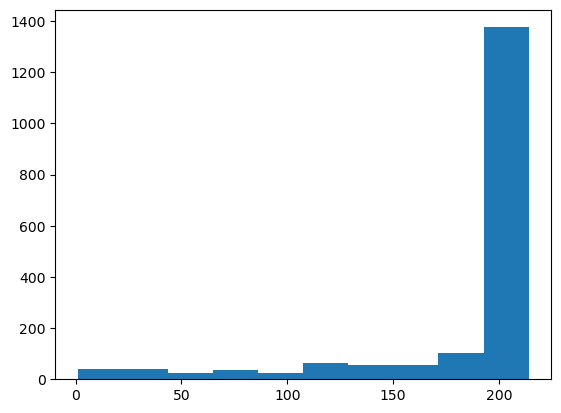

In [48]:
plt.hist(lengths)

In [49]:
# number of reads of non fails
lengths = []
for id in fails['BolusId'].unique():
    tmp = fails[fails['BolusId'] == id]
    lengths.append(len(tmp['ds']))

(array([1., 0., 0., 0., 1., 1., 2., 0., 3., 5.]),
 array([107. , 115.9, 124.8, 133.7, 142.6, 151.5, 160.4, 169.3, 178.2,
        187.1, 196. ]),
 <BarContainer object of 10 artists>)

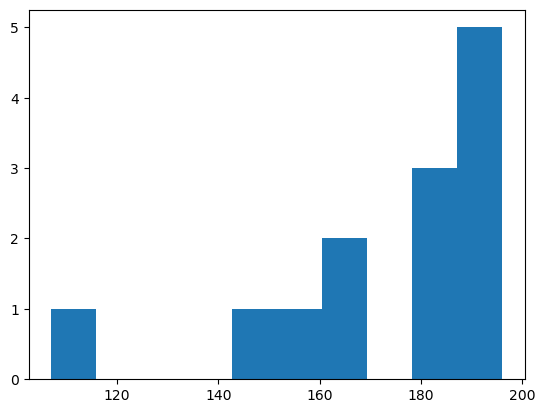

In [50]:
plt.hist(lengths)

In [27]:
df.sort_values(['BolusId', 'ds'])

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds,failed
437418,8/29/2023,400000,3.25,3254,Saft,Excellent,2023-08-29,0.0
437431,8/29/2023,400000,3.25,3254,Saft,Excellent,2023-08-29,0.0
432815,8/30/2023,400000,3.18,3181,Saft,Excellent,2023-08-30,0.0
432864,8/30/2023,400000,3.18,3181,Saft,Excellent,2023-08-30,0.0
425652,8/31/2023,400000,3.16,3155,Saft,Excellent,2023-08-31,0.0
...,...,...,...,...,...,...,...,...
217571,12/23/2023,401999,3.01,3005,Saft,Excellent,2023-12-23,0.0
223033,12/24/2023,401999,3.01,3009,Saft,Excellent,2023-12-24,0.0
234229,12/25/2023,401999,3.02,3023,Saft,Excellent,2023-12-25,0.0
252814,12/26/2023,401999,3.04,3039,Saft,Excellent,2023-12-26,0.0


# percent failed by brand

In [25]:
tadiran = df[df['Battery'] == 'Tadiran']
saft = df[df['Battery'] == 'Saft']

In [89]:
len(saft.BolusId.unique())

987

In [62]:
len(saft[saft['failed']==1].BolusId.unique())

4

In [63]:
# failure rate for saft
4/987

0.004052684903748734

In [90]:
tadiran['failed'] = 0
tadiran.loc[tadiran['BolusId'].isin(fails.BolusId), 'failed'] = 1
len(tadiran[tadiran['failed'] == 1].BolusId.unique()) / len(tadiran.BolusId.unique())

/var/folders/t_/3l5bssy909d0ghbcbgs160w00000gp/T/ipykernel_16153/2085552945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tadiran['failed'] = 0


0.01061320754716981

In [97]:
len(tadiran.BolusId.unique())

848

# days with reads


tadiran: 193.49056603773585
saft: 180.63728470111448


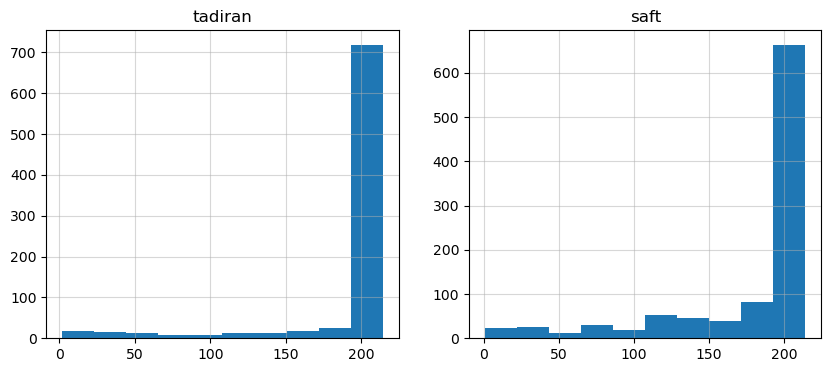

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

data = { 'tadiran': tadiran,'saft' : saft}
for i, (name, df_tmp) in enumerate(data.items()):
    ax[i].set_title(name)
    lengths = []
    for id in df_tmp['BolusId'].unique():
        tmp = df_tmp[df_tmp['BolusId'] == id]
        lengths.append(len(tmp['ds']))
    ax[i].hist(lengths)
    ax[i].grid(alpha=.5)
    print(f'{name}: {sum(lengths)/len(lengths)}')

    


In [104]:
tadiran

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds,failed
0,3/3/2024,401728,1.86,1856,Tadiran,Warning,2024-03-03,0
1,1/7/2024,401428,1.92,1920,Tadiran,Warning,2024-01-07,0
2,2/25/2024,401728,1.94,1936,Tadiran,Warning,2024-02-25,0
3,3/23/2024,400908,1.94,1936,Tadiran,Warning,2024-03-23,0
4,3/28/2024,400868,1.94,1936,Tadiran,Warning,2024-03-28,0
...,...,...,...,...,...,...,...,...
440371,1/11/2024,400777,3.55,3552,Tadiran,Irregular,2024-01-11,0
440372,2/22/2024,400773,3.55,3552,Tadiran,Irregular,2024-02-22,0
440373,1/13/2024,400914,3.55,3552,Tadiran,Irregular,2024-01-13,0
440374,3/2/2024,401230,3.57,3568,Tadiran,Irregular,2024-03-02,0


Text(0, 0.5, 'Normalized Read Counts')

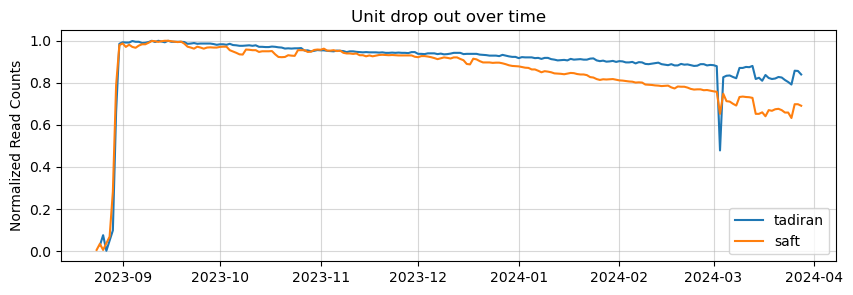

In [117]:
# reads over time
tad = tadiran.groupby('ds')['BolusId'].count().reset_index().sort_values('ds')
saf = saft.groupby('ds')['BolusId'].count().reset_index().sort_values('ds')

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(tad['ds'], tad['BolusId'] / max(tad['BolusId']), label='tadiran')
ax.plot(saf['ds'], saf['BolusId'] / max(saf['BolusId']), label='saft')
ax.grid(alpha=.5)
ax.legend()

ax.set_title("Unit drop out over time")
ax.set_ylabel("Normalized Read Counts")



Text(0, 0.5, 'Percent of Units with reads')

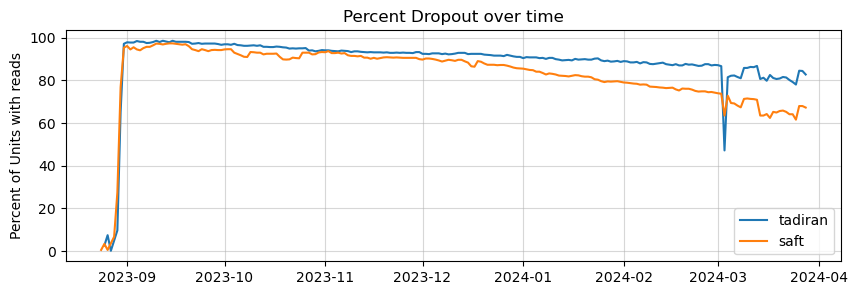

In [81]:
# percent of reads over time (based on the number of cows in each group)
tad_num = len(tadiran.BolusId.unique())
saf_num = len(saft.BolusId.unique())
tad = tadiran.groupby('ds')['BolusId'].count().reset_index().sort_values('ds')
saf = saft.groupby('ds')['BolusId'].count().reset_index().sort_values('ds')

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(tad['ds'], 100 *(tad['BolusId'] / tad_num), label='tadiran')
ax.plot(saf['ds'], 100* (saf['BolusId'] / saf_num), label='saft')
ax.grid(alpha=.5)
ax.legend()

ax.set_title("Percent Dropout over time")
ax.set_ylabel("Percent of Units with reads")


In [ ]:
# histogram of status over time

In [98]:
df

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds,failed
0,3/3/2024,401728,1.86,1856,Tadiran,Warning,2024-03-03,0.0
1,1/7/2024,401428,1.92,1920,Tadiran,Warning,2024-01-07,0.0
2,2/25/2024,401728,1.94,1936,Tadiran,Warning,2024-02-25,0.0
3,3/23/2024,400908,1.94,1936,Tadiran,Warning,2024-03-23,0.0
4,3/28/2024,400868,1.94,1936,Tadiran,Warning,2024-03-28,0.0
...,...,...,...,...,...,...,...,...
440371,1/11/2024,400777,3.55,3552,Tadiran,Irregular,2024-01-11,0.0
440372,2/22/2024,400773,3.55,3552,Tadiran,Irregular,2024-02-22,0.0
440373,1/13/2024,400914,3.55,3552,Tadiran,Irregular,2024-01-13,0.0
440374,3/2/2024,401230,3.57,3568,Tadiran,Irregular,2024-03-02,0.0


In [46]:
import random


In [52]:
random.choices([1,2,3,4], k=2)

[3, 4]

In [58]:
type(df['BolusId'].unique())

numpy.ndarray

In [61]:
tadiran

,ReadDateTime,BolusId,Voltage,BattRaw,Battery,Status,ds,failed
0,3/3/2024,401728,1.86,1856,Tadiran,Warning,2024-03-03,0.0
1,1/7/2024,401428,1.92,1920,Tadiran,Warning,2024-01-07,0.0
2,2/25/2024,401728,1.94,1936,Tadiran,Warning,2024-02-25,0.0
3,3/23/2024,400908,1.94,1936,Tadiran,Warning,2024-03-23,0.0
4,3/28/2024,400868,1.94,1936,Tadiran,Warning,2024-03-28,0.0
...,...,...,...,...,...,...,...,...
440371,1/11/2024,400777,3.55,3552,Tadiran,Irregular,2024-01-11,0.0
440372,2/22/2024,400773,3.55,3552,Tadiran,Irregular,2024-02-22,0.0
440373,1/13/2024,400914,3.55,3552,Tadiran,Irregular,2024-01-13,0.0
440374,3/2/2024,401230,3.57,3568,Tadiran,Irregular,2024-03-02,0.0


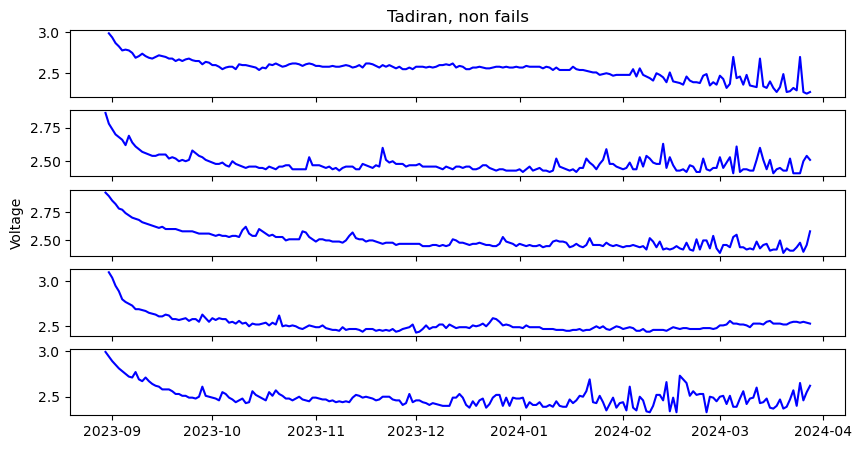

In [70]:
# voltage over time ( non fails taderan)
import numpy as np
fig, ax = plt.subplots(5, 1, figsize=(10, 5), sharex=True)
group = tadiran[tadiran['failed']==0]
ax[0].set_title("Tadiran, non fails")
ax[2].set_ylabel('Voltage')
for i, bolus in enumerate(random.sample(list(group['BolusId'].unique()), 5)):
    tmp = group[group['BolusId'] == bolus]
    tmp = tmp.sort_values('ds')
    ax[i].plot(tmp['ds'], tmp['Voltage'], color='blue')
        


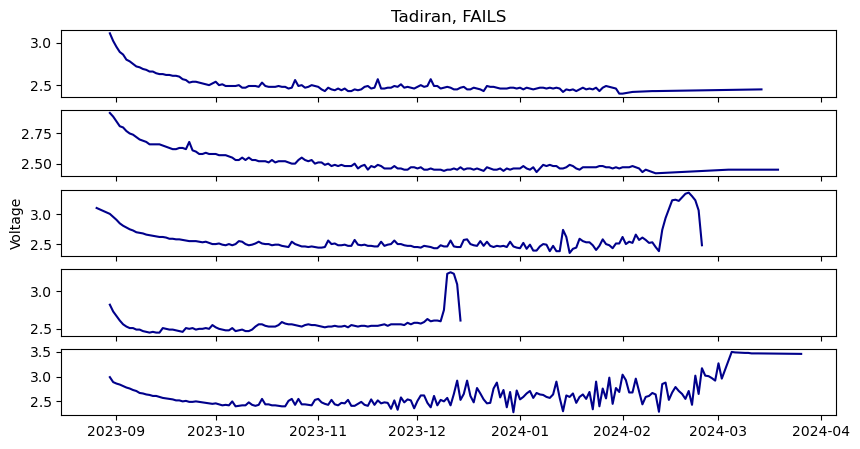

In [76]:
# voltage over time ( non fails taderan)
import numpy as np
fig, ax = plt.subplots(5, 1, figsize=(10, 5), sharex=True)
group = tadiran[tadiran['failed']==1]
ax[0].set_title("Tadiran, FAILS")
ax[2].set_ylabel('Voltage')
for i, bolus in enumerate(random.sample(list(group['BolusId'].unique()), 5)):
    tmp = group[group['BolusId'] == bolus]
    tmp = tmp.sort_values('ds')
    ax[i].plot(tmp['ds'], tmp['Voltage'], color='darkblue')

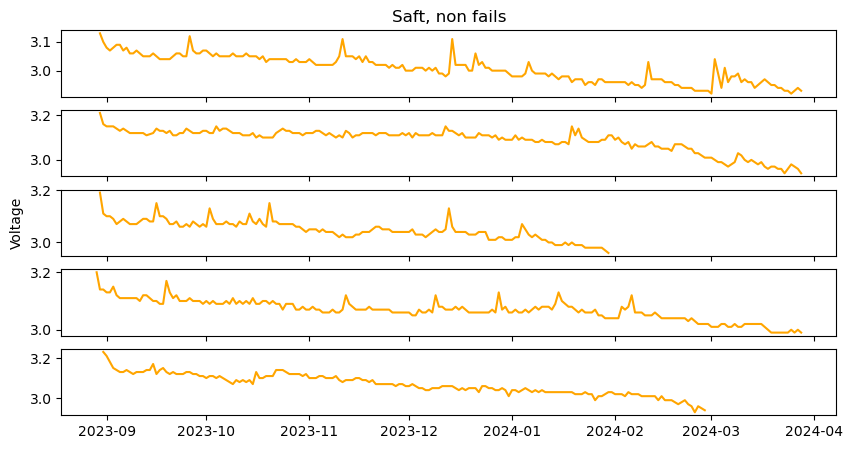

In [72]:
# voltage over time
import numpy as np
fig, ax = plt.subplots(5, 1, figsize=(10, 5), sharex=True)
group = saft[saft['failed']==0]
ax[0].set_title("Saft, non fails")
ax[2].set_ylabel('Voltage')
for i, bolus in enumerate(random.sample(list(group['BolusId'].unique()), 5)):
    tmp = group[group['BolusId'] == bolus]
    tmp = tmp.sort_values('ds')
    ax[i].plot(tmp['ds'], tmp['Voltage'], color='orange')

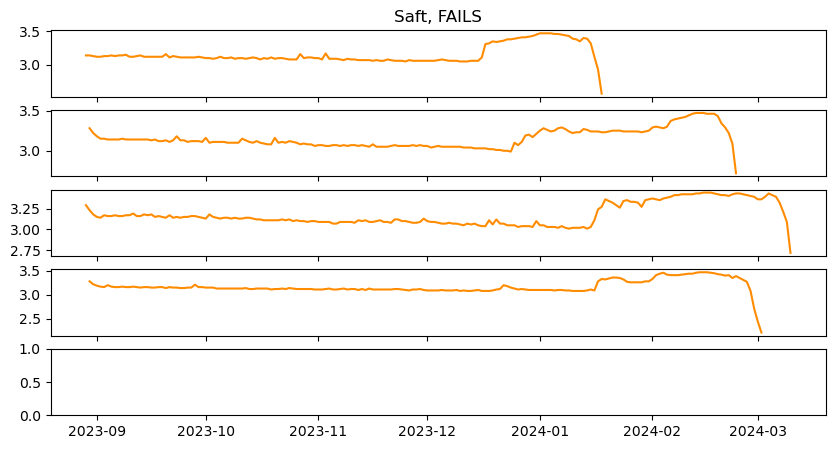

In [69]:
fig, ax = plt.subplots(5, 1, figsize=(10, 5), sharex=True)
group = saft[saft['failed']==1]
ax[0].set_title("Saft, FAILS")
for i, bolus in enumerate(random.sample(list(group['BolusId'].unique()), 4)): #there are only 4 saft fails
    tmp = group[group['BolusId'] == bolus]
    tmp = tmp.sort_values('ds')
    ax[i].plot(tmp['ds'], tmp['Voltage'], color='darkorange')

In [68]:
len(group['BolusId'].unique())

4

Text(0, 0.5, 'Count Of Units')

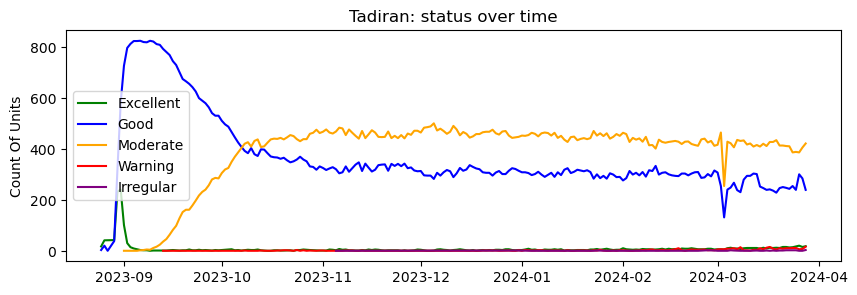

In [93]:
# status over time
color_map = {'Excellent': 'green', 'Good': 'blue', 'Moderate': 'orange', 'Warning':'red', 'Irregular':'purple'}
fig, ax = plt.subplots(figsize=(10,3))
for stat in ['Excellent', 'Good', 'Moderate', 'Warning', 'Irregular']:
    tmp = tadiran[tadiran['Status']==stat]
    tmp = tmp.groupby([ 'ds'])['BolusId'].count().reset_index().sort_values(['ds'])
    ax.plot(tmp['ds'], tmp['BolusId'], color=color_map[stat], label=stat)
ax.legend()
ax.set_title('Tadiran: status over time')
ax.set_ylabel('Count Of Units')

Text(0, 0.5, 'Count Of Units')

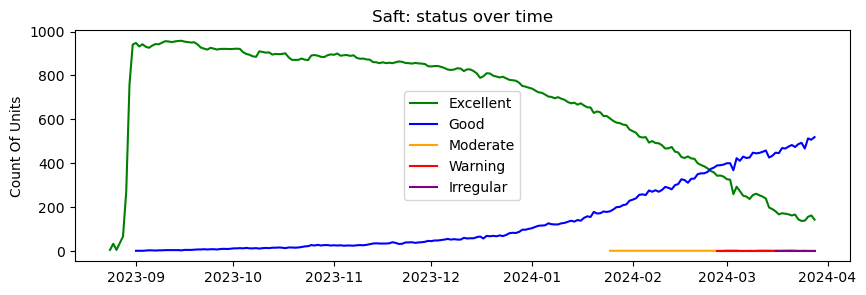

In [94]:
tadiran.groupby([ 'ds','Status'])['BolusId'].count().reset_index().sort_values(['ds', 'Status'])
color_map = {'Excellent': 'green', 'Good': 'blue', 'Moderate': 'orange', 'Warning':'red', 'Irregular':'purple'}
fig, ax = plt.subplots(figsize=(10,3))
for stat in ['Excellent', 'Good', 'Moderate', 'Warning', 'Irregular']:
    tmp = saft[saft['Status']==stat]
    tmp = tmp.groupby([ 'ds'])['BolusId'].count().reset_index().sort_values(['ds'])
    ax.plot(tmp['ds'], tmp['BolusId'], color=color_map[stat], label=stat)
ax.legend()
ax.set_title('Saft: status over time')
ax.set_ylabel('Count Of Units')

In [ ]:
what the difference between failure. and just the end of its life. it look like they are around the same time frame . so what the benifit in differenciating failure , and end of life. 

- i could chop them up into 60 day chunks, and the label be days til end of life. if we only want to predict failure and not en of life we may need to doa "recognize faiure " model first

In [ ]:
pd.display.max_rows = 1000